<a href="https://colab.research.google.com/github/slvyarc/Model-Prediksi-Kualitas-dan-Jenis-Wine/blob/main/Model_Prediksi_Kualitas_dan_Jenis_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Membangun Model Machine Learning dengan Multiple Output Menggunakan Keras Functional API: Studi Kasus Prediksi Kualitas dan Jenis Wine

Menggunakan Wine Quality Dataset dari UCI Machine Learning Repository. Dataset ini berisi informasi tentang berbagai atribut wine yang dapat digunakan untuk memprediksi kualitas dan jenis wine. Link dataset:[ UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/186/wine+quality).

## Imports

Langkah pertama dalam proyek ini adalah mengimpor library yang akan kita gunakan. Berikut adalah daftar library yang diimpor dan fungsinya:

In [34]:
import tensorflow as tf  # Mengimpor library TensorFlow
from tensorflow.keras.models import Model  # Mengimpor kelas Model dari Keras untuk membangun model
from tensorflow.keras.layers import Dense, Input  # Mengimpor lapisan Dense dan Input dari Keras untuk membangun lapisan-lapisan model

import numpy as np  # Mengimpor NumPy untuk operasi numerik
import matplotlib.pyplot as plt  # Mengimpor Matplotlib untuk visualisasi data
import pandas as pd  # Mengimpor Pandas untuk manipulasi dan analisis data
from sklearn.model_selection import train_test_split  # Mengimpor fungsi untuk membagi dataset menjadi set pelatihan dan pengujian
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Mengimpor fungsi untuk menghitung dan menampilkan matriks kebingungan
import itertools  # Mengimpor itertools untuk iterasi yang efisien (misalnya, untuk membuat grid search)

## Load Dataset

### Pre-process the white wine dataset
Dimulai dengan memuat dataset white wine dan menambahkan kolom baru bernama is_red untuk menunjukkan apakah wine tersebut red wine atau white wine. Untuk white wine, kita akan mengisi kolom ini dengan nilai nol (0).

In [35]:
# URL dari dataset white wine
URI = './winequality-white.csv'  # Menentukan URL dari dataset

# Memuat dataset dari URL
white_df = pd.read_csv(URI, sep=";")  # Membaca file CSV dan memuatnya ke dalam DataFrame Pandas

# Menambahkan kolom 'is_red' dengan nilai 0 untuk white wine
white_df["is_red"] = 0  # Mengisi kolom 'is_red' dengan nol (0)

# Hanya menyimpan item pertama dari duplikasi
white_df = white_df.drop_duplicates(keep='first')  # Menghapus baris duplikat dan hanya menyimpan baris pertama

white_df  # Menampilkan isi dari DataFrame

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [36]:
#Cek Missing value
white_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
is_red                  0
dtype: int64

In [37]:
white_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
is_red                    int64
dtype: object

### Pre-process the red wine dataset
Memuat dataset red wine. Sama seperti pada dataset white wine, kita akan menambahkan kolom is_red untuk menunjukkan apakah wine tersebut red wine atau white wine. Untuk red wine, kita akan mengisi kolom ini dengan nilai satu (1).

In [38]:
# URL dari dataset red wine
URI = './winequality-red.csv'  # Menentukan URL dari dataset

# Memuat dataset dari URL
red_df = pd.read_csv(URI, sep=";")  # Membaca file CSV dan memuatnya ke dalam DataFrame Pandas

# Menambahkan kolom 'is_red' dengan nilai 1 untuk red wine
red_df["is_red"] = 1  # Mengisi kolom 'is_red' dengan satu (1)

# Hanya menyimpan item pertama dari duplikasi
red_df = red_df.drop_duplicates(keep='first')  # Menghapus baris duplikat dan hanya menyimpan baris pertama

red_df  # Menampilkan isi dari DataFrame


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [39]:
#Cek Missing value
red_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
is_red                  0
dtype: int64

In [40]:
red_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
is_red                    int64
dtype: object

### Concatenate the datasets
Menggabungkan kedua dataset ini menjadi satu DataFrame.

In [41]:
# Menggabungkan dataset red wine dan white wine
df = pd.concat([red_df, white_df], ignore_index=True)  # Menggabungkan DataFrame red_df dan white_df, dan mengatur ulang indeks
df  # Menampilkan DataFrame hasil penggabungan

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [42]:
# Mengacak data
df = df.iloc[np.random.permutation(len(df))]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
3570,7.0,0.150,0.30,13.3,0.049,46.0,120.0,0.99704,3.20,0.36,9.5,7,0
4912,6.6,0.220,0.23,17.3,0.047,37.0,118.0,0.99906,3.08,0.46,8.8,6,0
5065,6.9,0.230,0.35,6.9,0.030,45.0,116.0,0.99244,2.80,0.54,11.0,6,0
2959,7.8,0.340,0.27,1.2,0.040,25.0,106.0,0.99320,3.01,0.55,10.4,5,0
554,7.7,0.915,0.12,2.2,0.143,7.0,23.0,0.99640,3.35,0.65,10.2,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3008,6.8,0.270,0.28,13.3,0.076,50.0,163.0,0.99790,3.03,0.38,8.6,6,0
4145,7.7,0.460,0.18,3.3,0.054,18.0,143.0,0.99392,3.12,0.51,10.8,6,0
3970,6.2,0.100,0.41,1.0,0.040,17.0,76.0,0.98988,3.14,0.56,11.4,7,0
2204,5.8,0.360,0.26,3.3,0.038,40.0,153.0,0.99110,3.34,0.55,11.3,6,0


<Axes: >

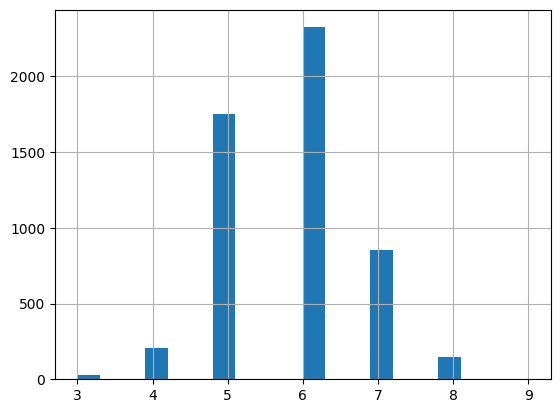

In [43]:
# Membuat histogram untuk kolom 'quality'
df['quality'].hist(bins=20)

Dari histogram tersebut, kita dapat melihat bahwa dataset kualitas wine tidak seimbang. Ada sangat sedikit sampel dengan nilai kualitas 3, 4, 8, dan 9. Ketidakseimbangan ini bisa menjadi masalah saat melatih model machine learning karena model mungkin akan cenderung mengabaikan kelas dengan jumlah sampel yang sangat sedikit.

### Imbalanced data
Untuk mengatasi ketidakseimbangan, kita bisa membuang observasi dengan nilai kualitas yang sangat sedikit.

In [44]:
# Mendapatkan data dengan kualitas wine lebih dari 4 dan kurang dari 8 (Membuang observasi dengan nilai kualitas 3, 4, 8, dan 9.)
df = df[(df['quality'] > 4) & (df['quality'] < 8)]

# Mereset indeks dan menghapus indeks lama
df = df.reset_index(drop=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.0,0.150,0.30,13.3,0.049,46.0,120.0,0.99704,3.20,0.36,9.5,7,0
1,6.6,0.220,0.23,17.3,0.047,37.0,118.0,0.99906,3.08,0.46,8.8,6,0
2,6.9,0.230,0.35,6.9,0.030,45.0,116.0,0.99244,2.80,0.54,11.0,6,0
3,7.8,0.340,0.27,1.2,0.040,25.0,106.0,0.99320,3.01,0.55,10.4,5,0
4,7.7,0.915,0.12,2.2,0.143,7.0,23.0,0.99640,3.35,0.65,10.2,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4926,6.8,0.270,0.28,13.3,0.076,50.0,163.0,0.99790,3.03,0.38,8.6,6,0
4927,7.7,0.460,0.18,3.3,0.054,18.0,143.0,0.99392,3.12,0.51,10.8,6,0
4928,6.2,0.100,0.41,1.0,0.040,17.0,76.0,0.98988,3.14,0.56,11.4,7,0
4929,5.8,0.360,0.26,3.3,0.038,40.0,153.0,0.99110,3.34,0.55,11.3,6,0


Untuk memahami distribusi kualitas wine dalam dataset, kita dapat membuat histogram dari kolom quality.

<Axes: >

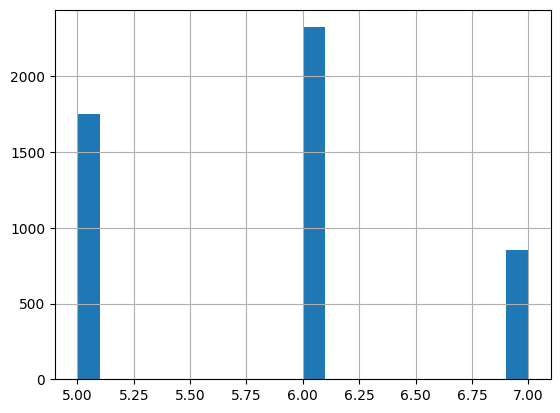

In [45]:
# Membuat histogram untuk kolom 'quality' setelah menyaring data
df['quality'].hist(bins=20)

Hasil plot diatas menunjukkan distribusi nilai kualitas wine yang lebih seimbang dengan fokus pada nilai 5, 6, dan 7. Sebagian besar sampel berada di sekitar nilai 6, diikuti oleh nilai 5 dan 7. Dengan memfilter data untuk hanya menyertakan nilai kualitas ini, kita telah mengurangi ketidakseimbangan dalam dataset, yang akan membantu dalam melatih model machine learning yang lebih efektif dan akurat.

### Train Test Split
Membagi dataset menjadi set pelatihan (train), set validasi (val), dan set pengujian (test).

In [46]:
# Membagi dataset menjadi 80:20 untuk train dan test sets
train, test = train_test_split(df, test_size=0.2, random_state=1)

# Membagi train set menjadi 80:20 untuk train dan val sets
train, val = train_test_split(train, test_size=0.2, random_state=1)

In [47]:
# Menjelajahi statistik data pelatihan
train_stats = train.describe()
train_stats.pop('is_red')  # Menghapus label 'is_red' dari statistik
train_stats.pop('quality')  # Menghapus label 'quality' dari statistik
train_stats = train_stats.transpose()
train_stats  # Menampilkan statistik data pelatihan

,count,mean,std,min,25%,50%,75%,max
fixed acidity,3155.0,7.242837,1.331678,3.80000,6.400000,7.0000,7.8000,15.60000
volatile acidity,3155.0,0.339653,0.162259,0.08000,0.230000,0.2900,0.4100,1.33000
citric acid,3155.0,0.320006,0.146062,0.00000,0.250000,0.3100,0.3900,1.66000
residual sugar,3155.0,4.979984,4.538252,0.70000,1.800000,2.6000,7.3250,65.80000
chlorides,3155.0,0.057059,0.037406,0.00900,0.038000,0.0470,0.0670,0.61100
free sulfur dioxide,3155.0,30.155151,17.107838,1.00000,17.000000,28.0000,41.0000,112.00000
total sulfur dioxide,3155.0,113.912837,56.562832,6.00000,74.000000,116.0000,153.0000,344.00000
density,3155.0,0.994560,0.003012,0.98711,0.992215,0.9947,0.9968,1.03898
pH,3155.0,3.223585,0.159640,2.74000,3.110000,3.2100,3.3300,4.01000
sulphates,3155.0,0.534824,0.147502,0.22000,0.440000,0.5100,0.6000,1.62000


### Get the labels
Memisahkan label (is_red dan quality) dari kolom fitur dalam dataset. Hal ini penting agar model dapat belajar memprediksi label tersebut.

In [48]:
def format_output(data):
    is_red = data.pop('is_red')  # Mengambil kolom 'is_red' dan menghapusnya dari DataFrame
    is_red = np.array(is_red)  # Mengubah kolom yang diambil menjadi array NumPy
    quality = data.pop('quality')  # Mengambil kolom 'quality' dan menghapusnya dari DataFrame
    quality = np.array(quality)  # Mengubah kolom yang diambil menjadi array NumPy
    return (quality, is_red)  # Mengembalikan label sebagai tuple

In [49]:
# Format output dari set pelatihan
train_Y = format_output(train)

# Format output dari set validasi
val_Y = format_output(val)

# Format output dari set pengujian
test_Y = format_output(test)

In [50]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
225,11.2,0.28,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
3557,5.6,0.35,0.14,5.00,0.046,48.0,198.0,0.99370,3.30,0.71,10.3
3825,6.6,0.21,0.30,9.90,0.041,64.0,174.0,0.99500,3.07,0.50,10.1
1740,6.7,0.31,0.33,2.00,0.033,12.0,74.0,0.99064,3.29,0.65,12.5
1221,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.99080,2.99,0.56,12.0


### Normalize the data

Kita akan menggunakan rumus normalisasi berikut:

$$x_{norm} = \frac{x - \mu}{\sigma}$$

- x adalah nilai asli
- μ adalah nilai rata-rata
- σ adalah standar deviasi.

In [51]:
# Fungsi untuk menampilkan data yang dinormalisasi
def cek_normalisasi(data, label):
    print(f"Data {label} yang dinormalisasi:")
    print(data.head())
    print("\n")

# Normalisasi data
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']  # Normalisasi data menggunakan rata-rata dan standar deviasi dari data pelatihan

# Normalisasi set pelatihan
norm_train_X = norm(train)
cek_normalisasi(norm_train_X, 'Train')

# Normalisasi set validasi
norm_val_X = norm(val)
cek_normalisasi(norm_val_X, 'Validation')

# Normalisasi set pengujian
norm_test_X = norm(test)
cek_normalisasi(norm_test_X, 'Test')


Data Train yang dinormalisasi:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
225        2.971561         -0.367641     1.643099       -0.678672   0.479620   
3557      -1.233659          0.063769    -1.232400        0.004410  -0.295654   
3825      -0.482727         -0.799051    -0.136972        1.084121  -0.429322   
1740      -0.407634         -0.182751     0.068421       -0.656637  -0.643191   
1221       0.643671         -0.429271     0.616135       -0.777829  -0.643191   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
225             -0.768955             -0.953150  1.142105 -0.398302   
3557             1.043080              1.486615 -0.285631  0.478673   
3825             1.978324              1.062308  0.146010 -0.962071   
1740            -1.061218             -0.705637 -1.301648  0.416032   
1221            -1.119671             -0.900111 -1.248523 -1.463200   

      sulphates   alcohol  
225    0.306273 -0.631283  

## Define the Model
Mendefinisikan model dasar menggunakan Keras Functional API. Model dasar ini akan terdiri dari dua lapisan Dense dengan masing-masing 128 neuron dan fungsi aktivasi ReLU.


In [52]:
def base_model(inputs):
    # Lapisan Dense pertama dengan 128 neuron dan aktivasi ReLU
    x = Dense(128, activation='relu')(inputs)
    # Lapisan Dense kedua dengan 128 neuron dan aktivasi ReLU
    x = Dense(128, activation='relu')(x)
    return x


# Define output layers of the model
Menambahkan lapisan output ke model dasar yang telah kita buat. Model ini akan memiliki dua output yang berbeda: satu untuk memprediksi kualitas wine dan satu lagi untuk memprediksi jenis wine.

In [53]:
def final_model(inputs):
    # Dapatkan model dasar
    x = base_model(inputs)

    # Menghubungkan lapisan Dense untuk regresi (kualitas wine)
    wine_quality = Dense(units=1, name='wine_quality')(x)

    # Menghubungkan lapisan Dense untuk klasifikasi (jenis wine) dengan aktivasi sigmoid
    wine_type = Dense(units=1, activation='sigmoid', name='wine_type')(x)

    # Definisikan model dengan input dan output layers
    model = Model(inputs=inputs, outputs=[wine_quality, wine_type])

    return model


## Compiling the Model
Melakukan kompilasi model yang telah kita definisikan. Kompilasi model adalah proses untuk menetapkan optimizer, fungsi loss, dan metrik evaluasi yang akan digunakan saat pelatihan model.

In [54]:
# Definisikan input layer dengan jumlah fitur dalam dataset (11 fitur)
inputs = tf.keras.layers.Input(shape=(11,))

# Gunakan optimizer RMSprop dengan learning rate 0.0001
rms = tf.keras.optimizers.RMSprop(lr=0.0001)

# Buat model akhir menggunakan input layer yang telah didefinisikan
model = final_model(inputs)

# Compile model dengan optimizer, fungsi loss, dan metrik evaluasi yang sesuai untuk setiap output
model.compile(optimizer=rms,
              loss={'wine_type': 'binary_crossentropy', 'wine_quality': 'mse'},
              metrics={'wine_type': 'accuracy', 'wine_quality': tf.keras.metrics.RootMeanSquaredError()})

# Tampilkan rangkuman model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 11)]                 0         []                            
                                                                                                  
 dense_2 (Dense)             (None, 128)                  1536      ['input_2[0][0]']             
                                                                                                  
 dense_3 (Dense)             (None, 128)                  16512     ['dense_2[0][0]']             
                                                                                                  
 wine_quality (Dense)        (None, 1)                    129       ['dense_3[0][0]']             
                                                                                            

## Training the Model
Melatih model menggunakan data pelatihan yang telah dinormalisasi

In [55]:
# Melatih model dengan data pelatihan dan memantau kinerjanya dengan data validasi
history = model.fit(norm_train_X, train_Y,
                    epochs=40,
                    validation_data=(norm_val_X, val_Y))

Epoch 1/40
99/99 [==============================] - 2s 9ms/step - loss: 3.9542 - wine_quality_loss: 3.6201 - wine_type_loss: 0.3341 - wine_quality_root_mean_squared_error: 1.9027 - wine_type_accuracy: 0.8824 - val_loss: 1.5089 - val_wine_quality_loss: 1.4135 - val_wine_type_loss: 0.0954 - val_wine_quality_root_mean_squared_error: 1.1889 - val_wine_type_accuracy: 0.9899
Epoch 2/40
99/99 [==============================] - 1s 5ms/step - loss: 1.1383 - wine_quality_loss: 1.0720 - wine_type_loss: 0.0663 - wine_quality_root_mean_squared_error: 1.0354 - wine_type_accuracy: 0.9902 - val_loss: 0.9156 - val_wine_quality_loss: 0.8768 - val_wine_type_loss: 0.0388 - val_wine_quality_root_mean_squared_error: 0.9364 - val_wine_type_accuracy: 0.9937
Epoch 3/40
99/99 [==============================] - 0s 5ms/step - loss: 0.7475 - wine_quality_loss: 0.7065 - wine_type_loss: 0.0410 - wine_quality_root_mean_squared_error: 0.8405 - wine_type_accuracy: 0.9927 - val_loss: 0.5942 - val_wine_quality_loss: 0.56

In [56]:
# Mengumpulkan metrik pelatihan
loss, wine_quality_loss, wine_type_loss, wine_quality_rmse, wine_type_accuracy = model.evaluate(x=norm_val_X, y=val_Y)

# Mencetak hasil evaluasi
print(f'loss: {loss}')
print(f'wine_quality_loss: {wine_quality_loss}')
print(f'wine_type_loss: {wine_type_loss}')
print(f'wine_quality_rmse: {wine_quality_rmse}')
print(f'wine_type_accuracy: {wine_type_accuracy}')

25/25 [==============================] - 0s 2ms/step - loss: 0.3834 - wine_quality_loss: 0.3758 - wine_type_loss: 0.0076 - wine_quality_root_mean_squared_error: 0.6130 - wine_type_accuracy: 0.9975
loss: 0.3833981454372406
wine_quality_loss: 0.3758215308189392
wine_type_loss: 0.007576583884656429
wine_quality_rmse: 0.6130428314208984
wine_type_accuracy: 0.9974651336669922


Dari hasil ini, kita bisa menyimpulkan bahwa model kita bekerja dengan sangat baik dalam mengklasifikasikan jenis wine dengan akurasi yang sangat tinggi dan juga cukup baik dalam memprediksi kualitas wine.

## Analyze the Model Performance

Menganalisis kinerja model yang telah dilatih. Model ini memiliki dua output: output pada indeks 0 adalah prediksi kualitas wine dan output pada indeks 1 adalah prediksi jenis wine.

In [57]:
# Membuat prediksi menggunakan data test yang telah dinormalisasi
predictions = model.predict(norm_test_X)

# Mengambil prediksi kualitas wine dari output pertama (indeks 0)
quality_pred = predictions[0]

# Mengambil prediksi jenis wine dari output kedua (indeks 1)
type_pred = predictions[1]


31/31 [==============================] - 0s 2ms/step


In [58]:
# Mencetak prediksi kualitas wine untuk contoh pertama dalam data test
print(quality_pred[0])

[5.5442553]


In [59]:
# Mencetak prediksi jenis wine untuk contoh pertama dan contoh ke-944 dalam data test
print(type_pred[0])
print(type_pred[944])

[3.027731e-05]
[0.00010021]


### Plot Utilities

Mendefinisikan beberapa fungsi utilitas untuk memvisualisasikan kinerja model.

In [60]:
#Langkah 1: Fungsi untuk Memplot Metrik

def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)  # Menetapkan judul untuk plot
    plt.ylim(0, ylim)  # Menetapkan batas y untuk plot
    plt.plot(history.history[metric_name], color='blue', label=metric_name)  # Memplot metrik pelatihan
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)  # Memplot metrik validasi
    plt.legend()  # Menampilkan legenda


In [61]:
#Langkah 2: Fungsi untuk Memplot Matriks Kebingungan

def plot_confusion_matrix(y_true, y_pred, title='', labels=[0, 1]):
    cm = confusion_matrix(test_Y[1], np.round(type_pred), labels=[0, 1])  # Menghitung matriks kebingungan
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)  # Membuat objek tampilan matriks kebingungan
    disp.plot(values_format='d')  # Menampilkan matriks kebingungan dengan format nilai integer
    plt.title(title)  # Menetapkan judul untuk plot

In [62]:
#Langkah 3: Fungsi untuk Memplot Perbedaan antara Nilai Sebenarnya dan Prediksi

def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)  # Membuat scatter plot dari nilai sebenarnya vs prediksi
    plt.xlabel('True Values')  # Menetapkan label untuk sumbu x
    plt.ylabel('Predictions')  # Menetapkan label untuk sumbu y
    plt.title(title)  # Menetapkan judul untuk plot
    plt.axis('equal')  # Membuat skala sumbu x dan y sama
    plt.axis('square')  # Membuat plot berbentuk kotak
    plt.plot([-100, 100], [-100, 100])  # Menambahkan garis diagonal
    return plt

### Plots for Metrics
Visualisasi metrik model

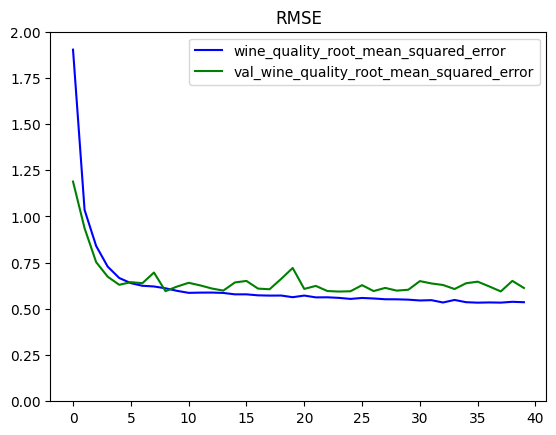

In [63]:
plot_metrics('wine_quality_root_mean_squared_error', 'RMSE', ylim=2)

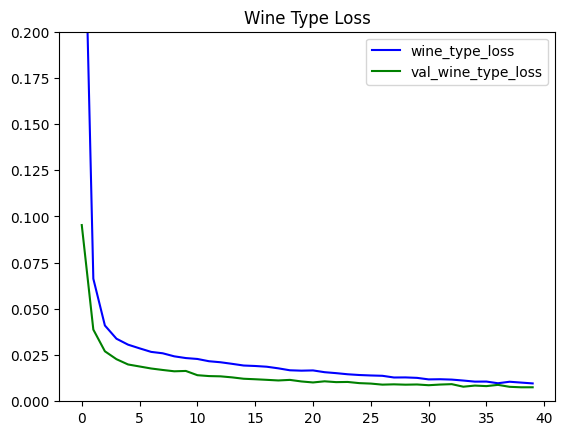

In [64]:
plot_metrics('wine_type_loss', 'Wine Type Loss', ylim=0.2)

Kedua grafik menunjukkan bahwa model multiple output yang dilatih memiliki performa yang baik dalam memprediksi kualitas wine dan jenis wine, dengan kesalahan prediksi yang rendah dan akurasi yang tinggi.








### Plots for Confusion Matrix

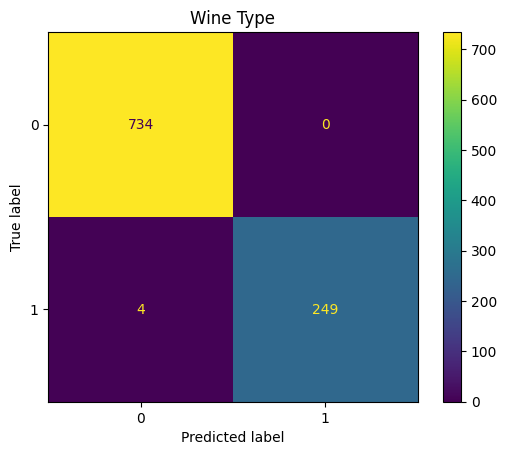

In [65]:
plot_confusion_matrix(test_Y[1], np.round(type_pred), title='Wine Type', labels = [0, 1])

Confusion matrix ini menunjukkan performa yang sangat baik dalam prediksi jenis wine dengan akurasi tinggi dan kesalahan yang sangat minim.

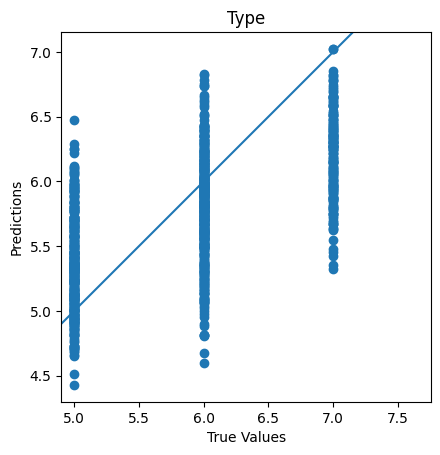

In [66]:
scatter_plot = plot_diff(test_Y[0], quality_pred, title='Type')

Scatter plot ini menunjukkan bahwa model cukup akurat dalam memprediksi kualitas wine. Sebagian besar prediksi dekat dengan garis diagonal, menunjukkan bahwa nilai prediksi model sangat dekat dengan nilai sebenarnya. Meskipun ada beberapa penyebaran, model menunjukkan tren yang baik dalam memprediksi kualitas wine.